# Приоритизация гипотез и приоведение А/В-тестов для интеренет магазина

Цель проекта увеличение выручки интерент-магазина.  
Задачи:  
- приоритизировать гипотезы,  
- запустить А/В-тесты,
- проанализировать результаты.

## Приоритезация гипотез

### Загрузим данные из файла в датафрейм

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as st

In [2]:
# прочитаем файл
hypothesis = pd.read_csv('hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Описание данных:**  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis ['Efforts']
hypothes_ice  = hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(2)
pd.options.display.max_colwidth = 150
display(hypothes_ice)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis ['Efforts']
hypothes_rice  = hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False).round(2)
pd.options.display.max_colwidth = 150
display(hypothes_rice)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**  
В случае применения фреймворка ICE наибольшую оценку получили гипотезы:  
- Запустить акцию, дающую скидку на товар в день рождения  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

После применения фреймворка RICE наибольшую получили гипотезы:  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  

Изменение распределения рейтинга связано с тем, что фреймворк RICE включает в себя показатель охвата пользователей.

## Анализ А/В-теста

### Загрузим данные из файла в датафрейм

In [5]:
orders = pd.read_csv('orders.csv')
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Описание данных:**  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
# преобразуем дату в приемлемый формат
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
visitors = pd.read_csv('visitors.csv')
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Описание данных:**  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;   
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.

In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# преобразуем дату в приемлемый формат
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Построим график кумулятивной выручки по группам.

In [11]:
# создадим датафрейм c уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x:orders[
    np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date':'max', 
                                           'group':'max', 
                                           'transactionId':'nunique', 
                                           'visitorId':'nunique', 
                                           'revenue':'sum'}), axis=1)\
                                     .sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x:visitors[
    np.logical_and(visitors['date'] <= x['date'], visitors['group'] ==x['group'])]                                       
                                         .agg({'date':'max',
                                               'group': 'max',
                                               'visitors':'sum'}),axis=1)\
                                         .sort_values(by=['date','group'])

# Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group'
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [12]:
# проверим не попадают ли какие-то пользователи в обе группы - по таблице с заказами
duplicate = orders.groupby(['visitorId']).agg({'group' : 'nunique', 
                                                    'transactionId' : 'count', 
                                                    'revenue' : 'sum'}).reset_index()
duplicate_v = duplicate[duplicate.group != 1]["visitorId"]
print(f'Пользователи, попавшие в обе группы: {duplicate_v.count()}')

Пользователи, попавшие в обе группы: 58


Количество пользователей попавших в обе группы не значительно (примерно 5% от общего числа) можно исключить их из расчетов для более корректного отражения результатов.

In [13]:
orders = orders.query('visitorId not in @duplicate_v')

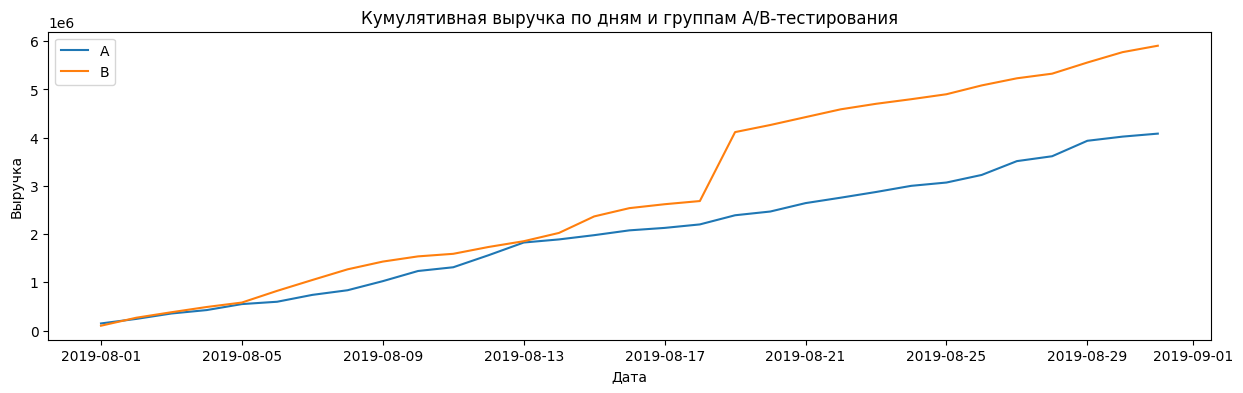

In [14]:
# Объявим переменные cumulativeRevenueA и cumulativeRevenueB, 
# в которых сохраним данные о датах, выручке и числе заказов в группах A и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# построим график выручки по группам
plt.figure(figsize=(15,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Кумулятивная выручка по дням и группам A/B-тестирования")
plt.legend()
plt.show();

С самого начала теста группа В лидировала по продажам, а после 20.08.2019 наблюдается резкий скачек выручки этой группы. Вероятнее всего это связано с анамально большими заказами. При заключительном анализе их нужно удалить.

### Построим графики кумулятивного среднего чека по группам

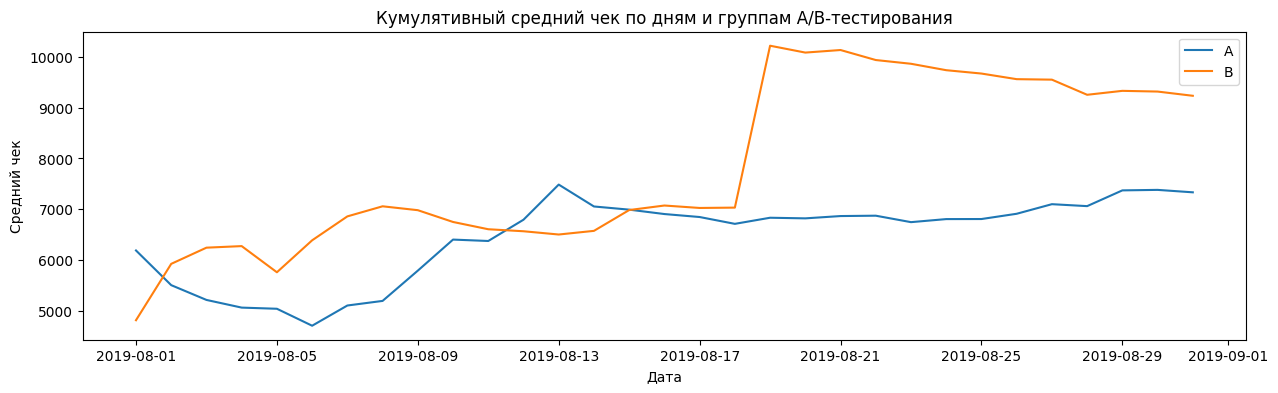

In [15]:
plt.figure(figsize=(15,4))
plt. plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt. plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.legend()
plt.show();

Кумулятивное значение среднего чека группы В также в целом выше чем у группы А, также наблюдается сильный скачек стоимости среднего чека по группе В после 20.08.2019 как и на предыдущем графике. Очевидно, здесь есть влияние выбросов

### Построим график относительного изменения кумулятивного среднего чека группы В к группе А

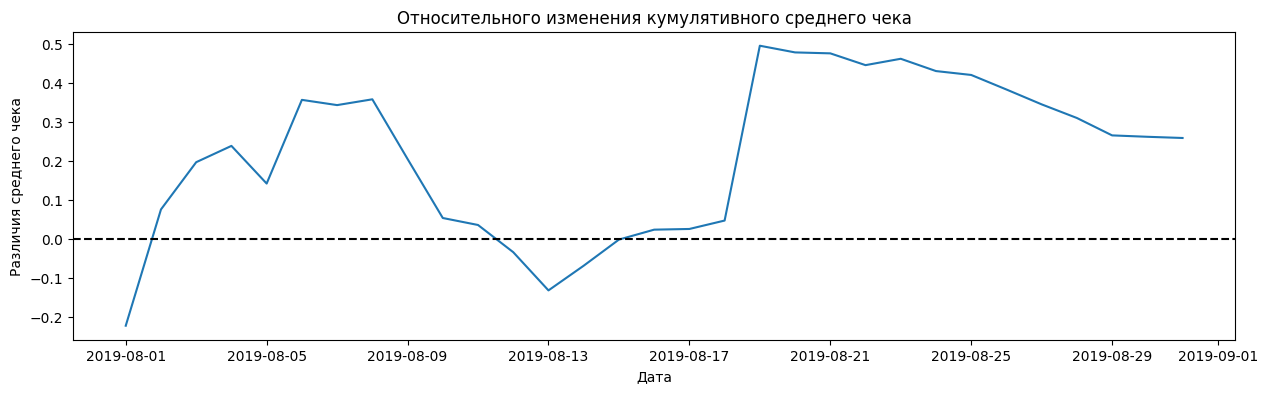

In [16]:
# Объединим таблицы cumulativeRevenueA и cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', suffixes=['A', 'B'])

# строим график относительного изменения кумулятивного среднего чека
plt.figure(figsize=(15,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.ylabel('Различия среднего чека')
plt.title("Относительного изменения кумулятивного среднего чека")
plt.axhline(y=0, color='black', linestyle='--')
plt.show();

Результаты теста значительно меняются в несколько дат. Возможно тогда и были совершены аномальные заказы.

### Построим график кумулятивного среденего количества заказов на посетителя по группам.

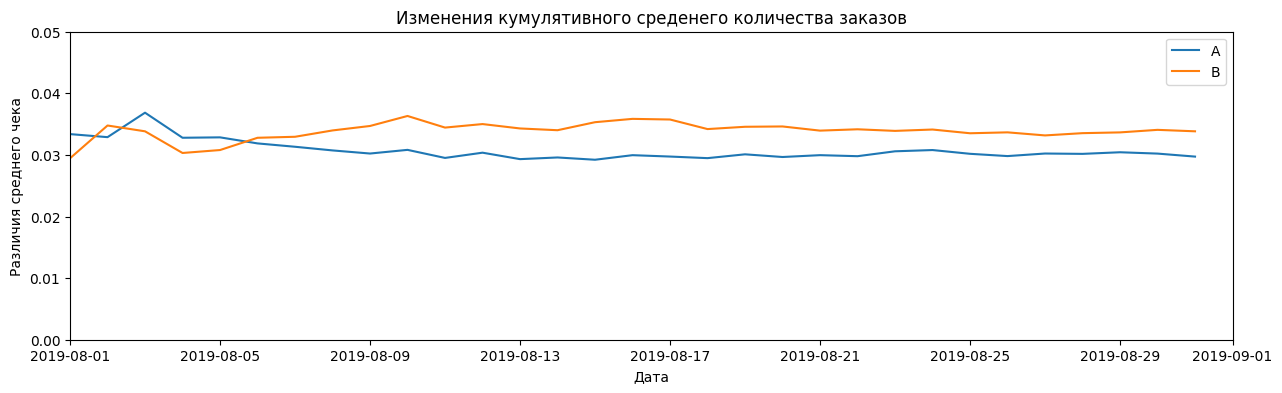

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
# отделяем данные по группе В
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
# строим график
plt.figure(figsize=(15,4))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Различия среднего чека')
plt.title("Изменения кумулятивного среденего количества заказов")
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

В начале сигмент А имел большую конверсию, но постепенно сигмент В выровнялся и зафиксировался на одном значении, больше значения сигмента А. 

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

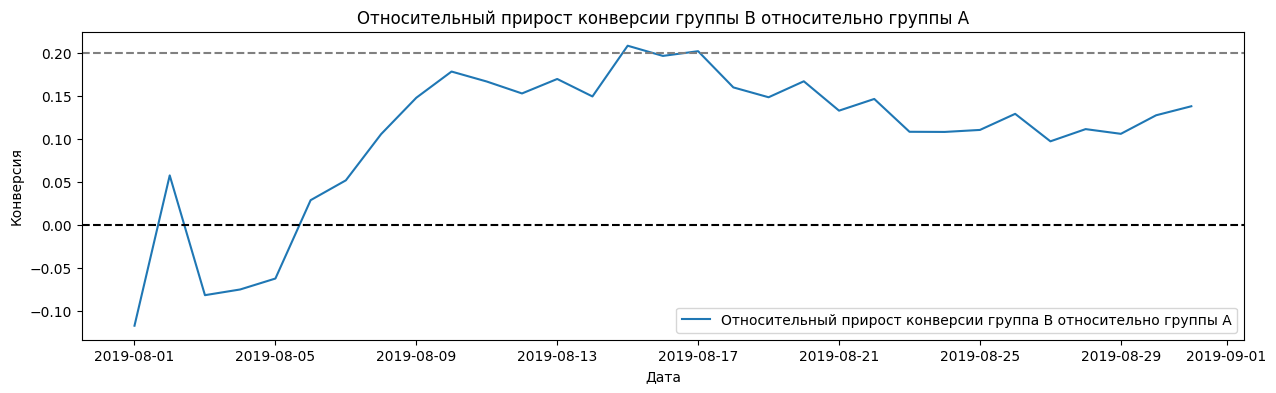

In [18]:
# Объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A','B']
)
plt.figure(figsize=(15,4))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label='Относительный прирост конверсии группа В относительно группы А')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title("Относительный прирост конверсии группы В относительно группы А")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

Почти с самого начала теста группа В лидирует по конверсии: не смотря на некоторое снижение к концу периода прирост составил 10-15% относительно группы А.

### Постройте точечный график количества заказов по пользователям.

      visitorId  transactionId
908  3967698036              3
55    249864742              3
478  2108163459              3
687  2988190573              3
890  3908431265              3
138   611059232              3
632  2742574263              3
157   678354126              2
323  1404560065              2
452  1985475298              2


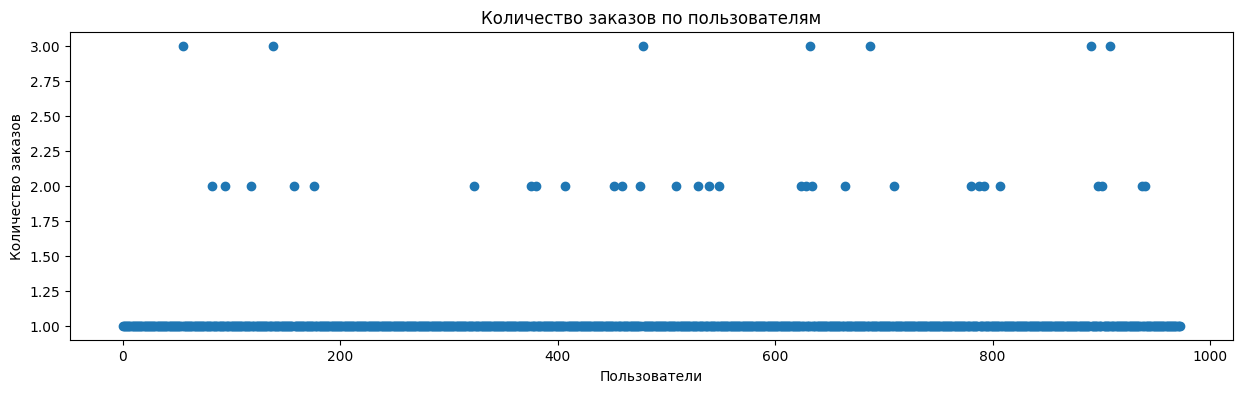

In [19]:
# Найдем число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
    
)
ordersByUsers.columns = ['visitorId', 'transactionId']

print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,4))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям");

Пользователей заказавших более 2 раз очень мало. Это могут быть анамалии. Проверим это посчитав процентили

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [20]:
print(np.percentile(ordersByUsers['transactionId'], [95,99]))

[1. 2.]


Не более 5% пользователей совершили больше 2 заказов и не более 1% пользователей - больше 2 заказов.

### Построим точечный график стоимостей заказов

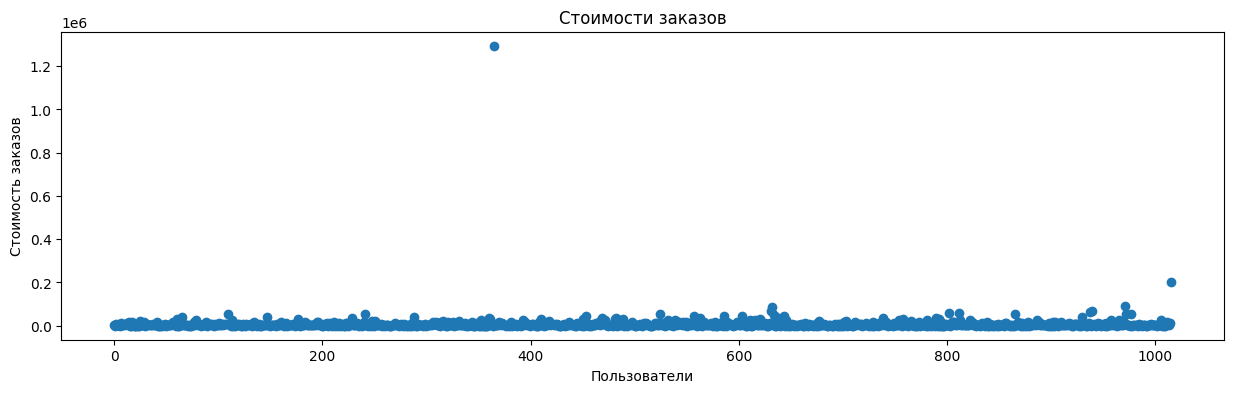

In [21]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15,4))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов");

Есть выбросы в районе 200.000 руб. и 1.300.000 руб.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [22]:
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


Не более 5% заказов стоимость чека больше 26785 руб. и не более 1% заказов стоимость чека больше 53904 руб.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.  
Альтернативная гипотеза: различия в среднем между группами есть.

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [24]:
# Создадим переменные ordersByUsersA и ordersByUsersB. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 


In [25]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders'),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders'),
    ],
    axis=0,
)

In [26]:
print('P-value:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительные различия: 0.160


P-value меньше 0.05, поэтому отвергаем нулевую гипотезу. По анализу "сырых данных" можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [27]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=="A"]['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительные различия: 0.287


P-value больше 5%, значит статистически значимых различий в среднем чеке между группами нет. Относительное различие чека между сигментами 28,7% полученно случайно.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 30.000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 20.000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitorId, dtype: int64
77


Всего 77 аномальных пользователя. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

Нулевая гипотеза: различий в среднем количестве заказов между группами нет  
Альтернативная гипотеза: различи в среднем количестве между группами есть

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [30]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.013
Относительные различия: 0.180


Как и в случае сырыми данными P-value меньше 0.05, статистическая значимость достигнута. Сегмент В предпочтительнее сегмента А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [31]:
print('P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.829
Относительные различия: -0.011


P-value увеличился и также составляет больше 5%, значит статистически значимых различий в среднем чеке между группами нет, относительное различие среднего чека между сигментами 3,1% получено случайно.

## Вывод

- Есть статистически значимое различие по конверсии между группами.  

- По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после удаления выбросов.  

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.  

- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.  

По результатам теста можно рекомендовать остановить тест, признать победу группы В.